# 例4.5.1

<div class="toc"><ul class="toc-item"><li><span><a href="#读入数据" data-toc-modified-id="读入数据-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>读入数据</a></span></li><li><span><a href="#协方差相等检验前的正态性检验" data-toc-modified-id="协方差相等检验前的正态性检验-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>协方差相等检验前的正态性检验</a></span></li><li><span><a href="#协方差相等检验-BoxM检验" data-toc-modified-id="协方差相等检验-BoxM检验-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>协方差相等检验-BoxM检验</a></span></li><li><span><a href="#多元方差分析" data-toc-modified-id="多元方差分析-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>多元方差分析</a></span></li><li><span><a href="#使用四种统计量做检验并比较" data-toc-modified-id="使用四种统计量做检验并比较-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>使用四种统计量做检验并比较</a></span></li><li><span><a href="#探究差异是由哪些因素引起的" data-toc-modified-id="探究差异是由哪些因素引起的-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>探究差异是由哪些因素引起的</a></span></li><li><span><a href="#剔除影响最大的丁之后再做多元方差分析" data-toc-modified-id="剔除影响最大的丁之后再做多元方差分析-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>剔除影响最大的丁之后再做多元方差分析</a></span></li><li><span><a href="#绘图直观分析差异性" data-toc-modified-id="绘图直观分析差异性-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>绘图直观分析差异性</a></span></li></ul></li></ul></div>

## 读入数据

In [1]:

data = read.table('.//AMSA_data//《应用多元统计分析》（第6版）文本数据（以逗号为间隔）//examp4.5.1.csv',header = TRUE
                    ,sep = ',',col.names = c('商品甲销售额','商品乙销售额','商品丙销售额','商品丁销售额','销售方式'))
data1 = subset(data, 销售方式=='1')[,1:4] # 按照销售方式划分
data2 = subset(data, 销售方式=='2')[,1:4]
data3 = subset(data, 销售方式=='3')[,1:4]

## 协方差相等检验前的正态性检验

In [2]:

# 由于BoxM检验对于非正态情形敏感，我们先检验一下三个总体是否服从正态
# install.packages('mvnormtest')
library(mvnormtest)
mshapiro.test(t(data1))
mshapiro.test(t(data2))
mshapiro.test(t(data3))  # 多元正态分布检验：根据结果，只有销售方式2的p- value>0.05，接受原假设,即认为数据满足正态分布（这可能对于后续检验的结果分析存在影响）


	Shapiro-Wilk normality test

data:  Z
W = 0.88148, p-value = 0.01881



	Shapiro-Wilk normality test

data:  Z
W = 0.90684, p-value = 0.0555



	Shapiro-Wilk normality test

data:  Z
W = 0.90097, p-value = 0.043


## 协方差相等检验-BoxM检验

In [4]:

# install.packages('heplots')
library(heplots)
boxM(data[1:4],data[,5]) # 根据结果p- value>0.05接受原假设,即认为三种销售方式的协方差矩阵无显著差异


	Box's M-test for Homogeneity of Covariance Matrices

data:  data[1:4]
Chi-Sq (approx.) = 23.014, df = 20, p-value = 0.2881


## 多元方差分析

In [16]:

library(MASS)
attach(data)
group = factor(销售方式)
y = cbind(商品甲销售额,商品乙销售额,商品丙销售额,商品丁销售额)
detach(data)
fit = manova(y~group)
summary(fit) # 根据结果p- value<0.05拒绝原假设,即认为三种销售方式的销售额有显著差异

          Df  Pillai approx F num Df den Df   Pr(>F)   
group      2 0.36124   3.0309      8    110 0.004076 **
Residuals 57                                           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## 使用四种统计量做检验并比较

In [17]:

summary(fit,test = 'Wilks') #使用Wilks统计量
summary(fit,test = 'Pillai') 
summary(fit,test = 'Hotelling-Lawley')
summary(fit,test = 'Roy')
# 只有Wilks统计量的P值是准确的，其余三个统计量的P值都是近似值
# 其中，Pillai’s Trace结果更加稳健，推荐实验设计不均衡或不满足方差-协方差同质性假设时使用。
# 在这里，四种检验方法结果均显示拒绝原假设,即都认为三种销售方式的销售额有显著差异。

          Df   Wilks approx F num Df den Df   Pr(>F)   
group      2 0.66636   3.0379      8    108 0.004048 **
Residuals 57                                           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          Df  Pillai approx F num Df den Df   Pr(>F)   
group      2 0.36124   3.0309      8    110 0.004076 **
Residuals 57                                           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          Df Hotelling-Lawley approx F num Df den Df   Pr(>F)   
group      2          0.45928   3.0427      8    106 0.004043 **
Residuals 57                                                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          Df     Roy approx F num Df den Df   Pr(>F)   
group      2 0.33605   4.6206      4     55 0.002745 **
Residuals 57                                           
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## 探究差异是由哪些因素引起的

In [18]:

summary.aov(fit) # 输出一元方差分析表格
# 根据四个方差分析表格的p值，在a=0.05的水平下，我们认为甲有显著的差异，丁有十分显著的差异，而乙和丙没有显著的差异

 Response 商品甲销售额 :
            Df Sum Sq Mean Sq F value  Pr(>F)  
group        2   5221 2610.65  3.3766 0.04113 *
Residuals   57  44070  773.15                  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response 商品乙销售额 :
            Df Sum Sq Mean Sq F value Pr(>F)
group        2  518.5  259.27  1.6154 0.2078
Residuals   57 9148.0  160.49               

 Response 商品丙销售额 :
            Df Sum Sq Mean Sq F value Pr(>F)
group        2   2481  1240.4  0.1656 0.8478
Residuals   57 427028  7491.7               

 Response 商品丁销售额 :
            Df Sum Sq Mean Sq F value    Pr(>F)    
group        2  38529 19264.7  8.0085 0.0008607 ***
Residuals   57 137115  2405.5                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## 剔除影响最大的丁之后再做多元方差分析

In [19]:

attach(data)
y2 = cbind(商品甲销售额,商品乙销售额,商品丙销售额)
detach(data)
fit2 = manova(y2~group)
summary(fit2) # 根据结果p- value>0.05接受原假设,即认为三种销售方式的销售额无显著差异。
# 因此可以认为甲商品对三种销售方式的差异无明显的影响

          Df  Pillai approx F num Df den Df Pr(>F)
group      2 0.13304   1.3302      6    112 0.2496
Residuals 57                                      

## 绘图直观分析差异性

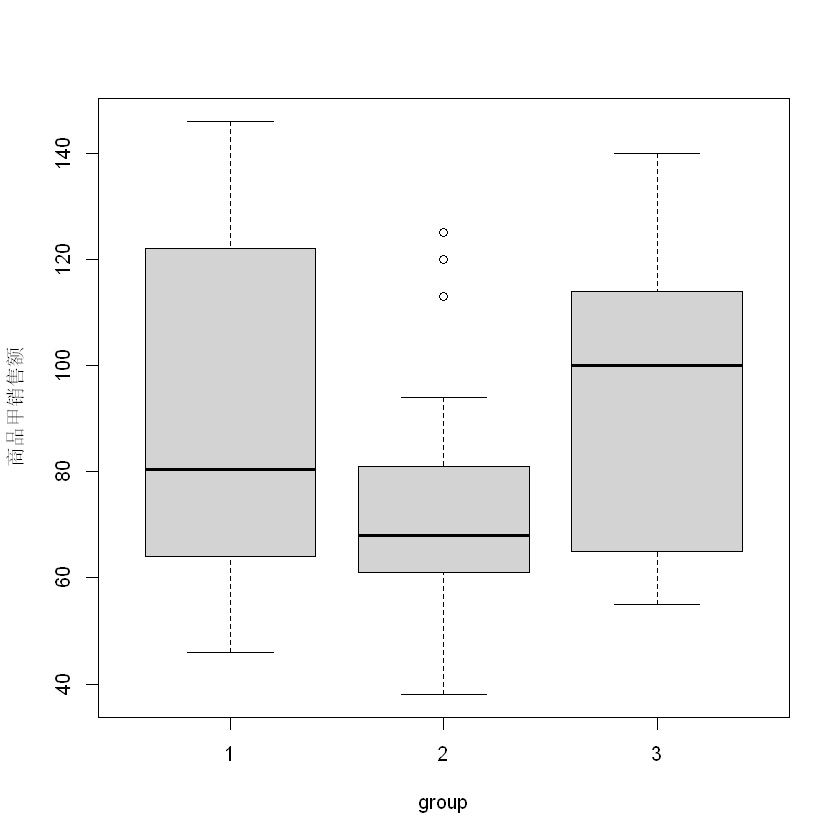

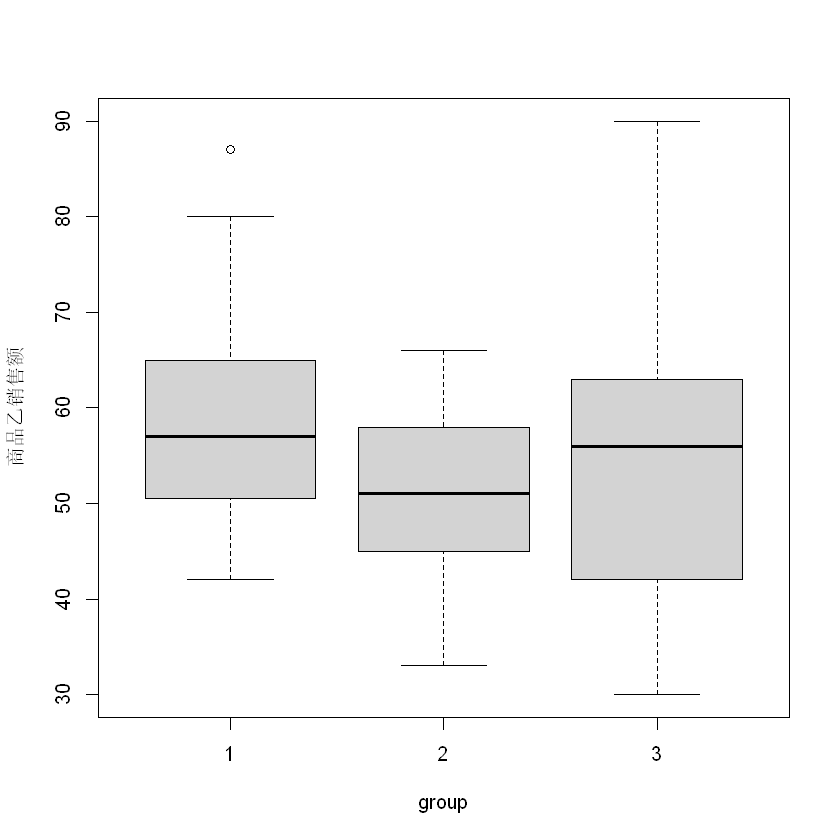

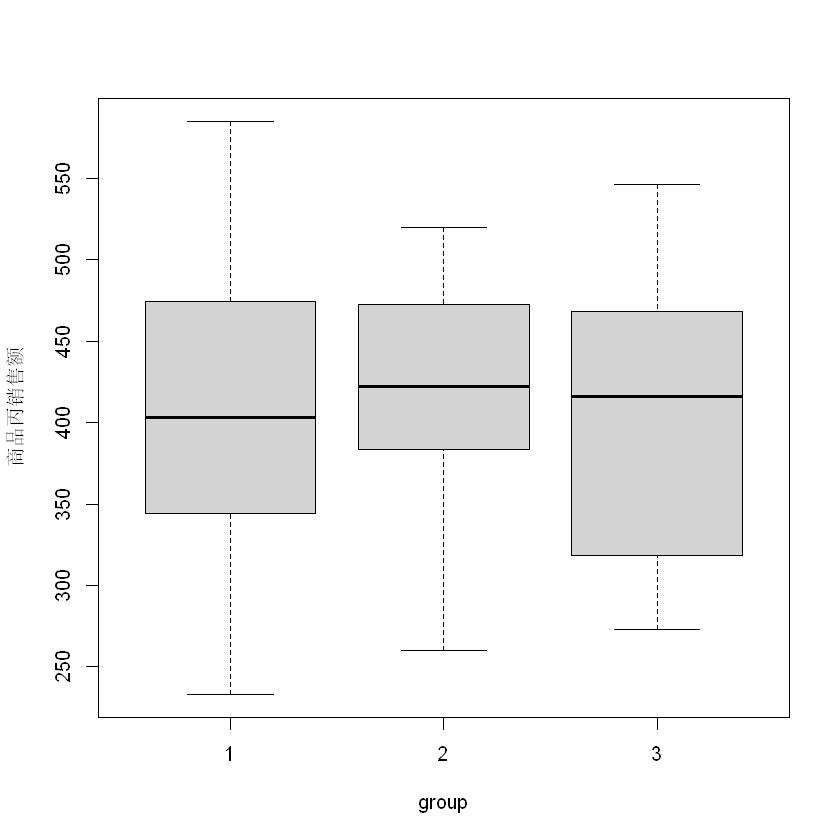

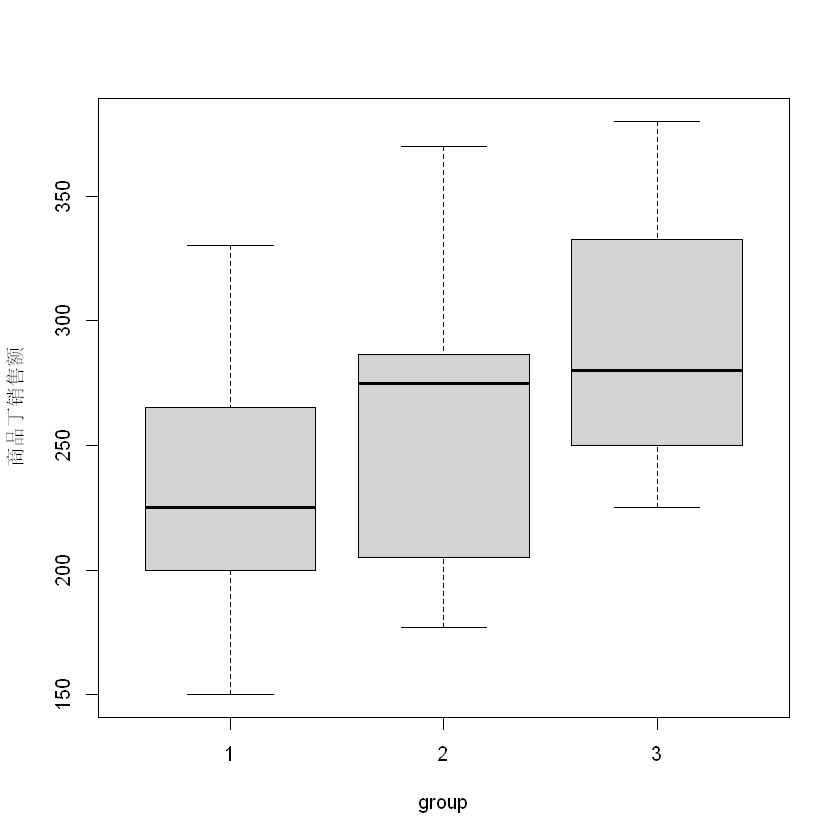

In [20]:

attach(data)
boxplot(商品甲销售额~group)
boxplot(商品乙销售额~group)
boxplot(商品丙销售额~group)
boxplot(商品丁销售额~group)
detach(data)
# 可以明显的看到，丁组的三个分布均值差异很大，而乙丙的则很接近。这说明，销售方式的改变对于丁商品而言是影响最大的，而对于乙丙商品则收效甚微。